In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
import seaborn as sns
import numpy as np
import matplotlib
import os

In [2]:
import importlib
import euler_utils
import plotting_utils
import predictions_evaluations
import utils
import idf_plotting

/cluster/apps/nss/gcc-6.3.0/python/3.8.5/x86_64/lib64/python3.8/site-packages/pyproj/__init__.py:78: UserWarning: Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.
  warnings.warn(str(err))


In [3]:
importlib.reload(euler_utils)
importlib.reload(plotting_utils)
importlib.reload(predictions_evaluations)
importlib.reload(utils)
importlib.reload(idf_plotting)

<module 'idf_plotting' from '/cluster/home/mfrancesc/IVT/eqasim-java/switzerland/Analysis_notebooks/idf_plotting.py'>

In [4]:
scratch_folder = '/cluster/scratch/mfrancesc/IVT/SA_scenario/'
work_folder = '/cluster/work/ivt_vpl/mfrancesc/SA_scenario/'
last_iter = 60
methods = ['markov','msa02','mw5']

In [5]:
data_fixed = euler_utils.read_output(
    os.path.join(scratch_folder,"idf","no_rej","fixed","1000"),
    last_iter=last_iter
)

100%|██████████| 61/61 [00:16<00:00,  3.62it/s]


In [6]:
data_fixed_list = [('fixed 1000 vehicles', data_fixed, last_iter)]

In [7]:
display(plotting_utils.get_multiple_stats_table(data_fixed_list))

fixed 1000 vehicles (it.60)
Number of rides                                                       84106
Wait time (min)                   Mean                              19.3931
                                  Median                               11.8
                                  Std                                18.391
                                  75-percentile                     32.5833
                                  99-percentile                       63.15
                                  Max                                242.25
Travel time (min)                 Mean                              12.1102
                                  Median                            8.56667
                                  Std                               11.8538
                                  75-percentile                       15.55
                                  99-percentile                       58.25
                                  Max                                 249.3
Mean direct distance (km)                                           2.03695
Average detour factor (time wise)                                   1.76974
Total execution time                                        1 days 04:59:13

In [8]:
navy_hex = matplotlib.colors.to_hex('navy')
red_hex = matplotlib.colors.to_hex('darkred')
c_gradient = utils.get_color_gradient(red_hex, navy_hex, 3)

plot_list_color = [
    ('1000 vehicles fixed', data_fixed, c_gradient[0], '-'),
    #('200 veh MSA=0.2', data_200['msa02'], c_gradient[1], '--'),
    #('200 veh MW=5', data_200['mw5'], c_gradient[2], ':')
]

In [17]:
data_fixed['drt_predictions'][60][data_fixed['drt_predictions'][60].waitingTime_min != 10]

,personId,tripIndex,startLink,startTime,travelTime_min,accessEgressTime_min,cost_MU,waitingTime_min,euclideanDistance_km,maxTravelTime_min,directRideTime_min
7,11641078,0,NaN,0.0,0.0,4.583333,0.0,0.0,0.254471,0.0,0.0
8,11641078,1,NaN,0.0,0.0,4.583333,0.0,0.0,0.254471,0.0,0.0
88,11653238,1,NaN,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
342,11653415,1,NaN,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
380,11641539,0,NaN,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
22178,5788224,2,NaN,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
22179,5788224,3,NaN,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
22191,5810561,3,NaN,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
22192,5810561,4,NaN,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0


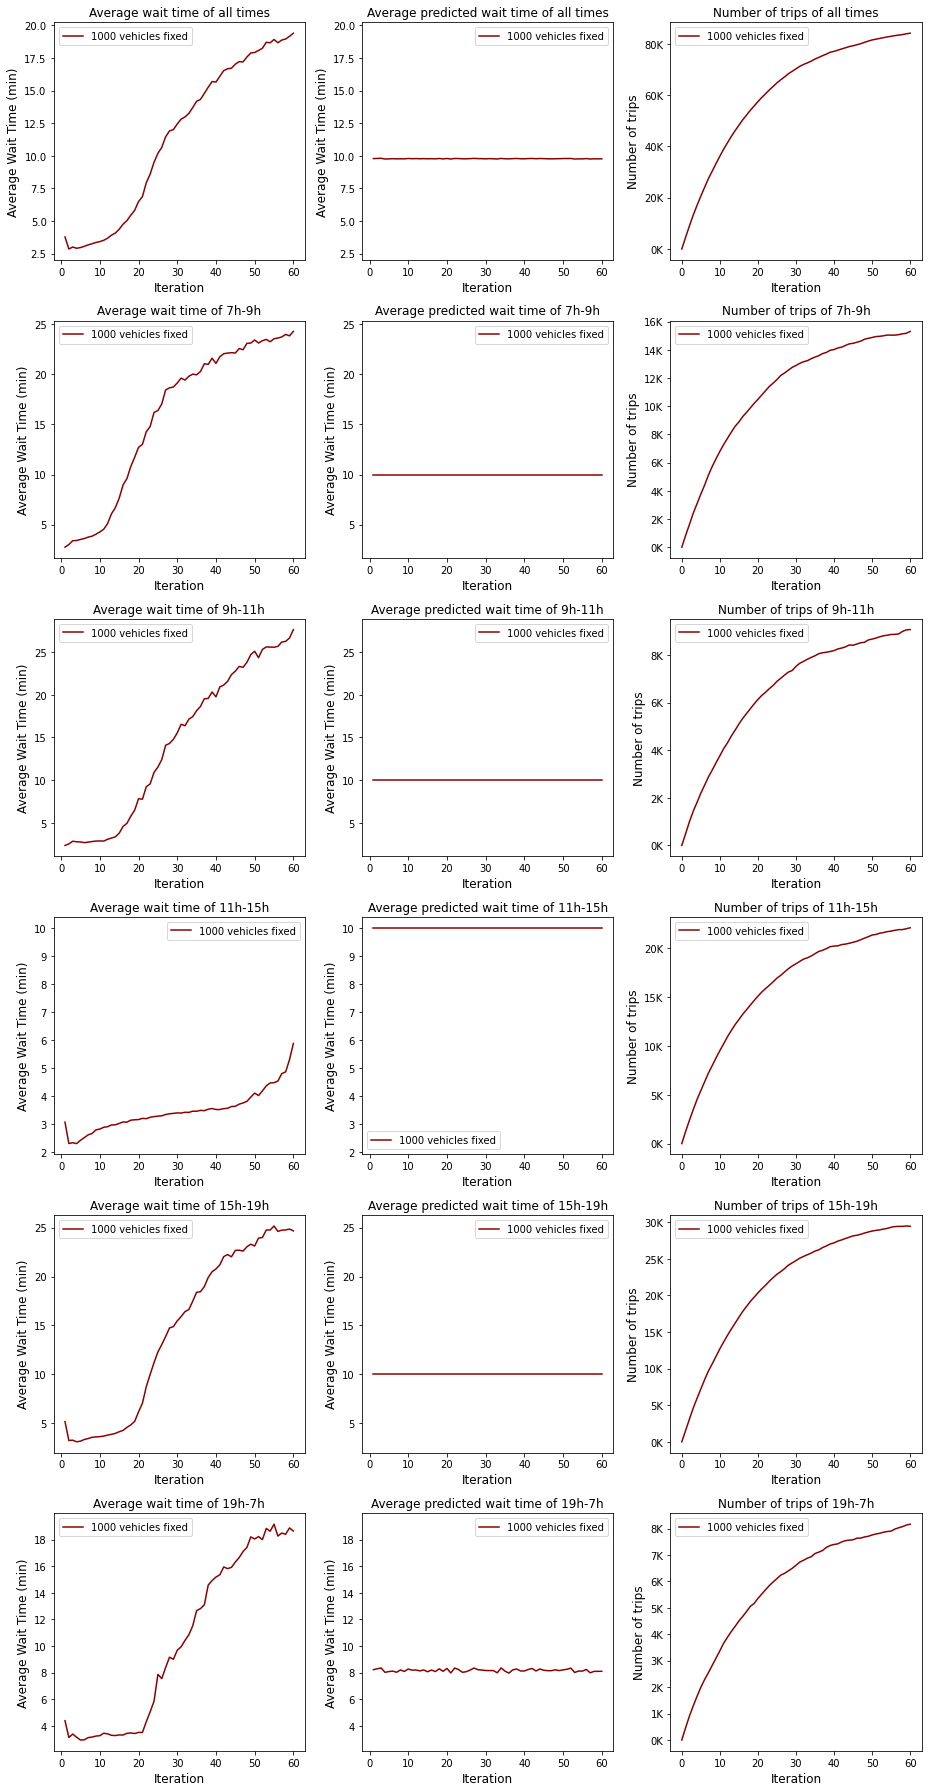

In [9]:
predictions_evaluations.plot_iteration_avg_wait_time(plot_list_color)